In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

from ipywidgets import interact, FloatSlider

In [3]:
def patch(*args, **kwargs):
    return args, kwargs

In [4]:
def figure(fig_handle):
    if fig_handle is None:
        fig, ax = plt.subplots()
    else:
        fig, ax = fig_handle

    return fig, ax

In [5]:
def link_dynamic_times(attr, time):
    if isinstance(attr, (list, tuple)):
        return [link_dynamic_times(a, time) for a in attr]
    elif isinstance(attr, str) and attr.find("@t") > -1:
        assert time is not None, "Must specify time value"
        return eval(attr.replace("@t", "t"), None, {"t": time})
    else:
        return attr

def draw_patches(patches, time=None, fig_handle=None):
    fig, ax = figure(fig_handle)
    common_styles = {
        'hatch': '/' * 8,
        'ec': 'gray',
        'fc': [0,0,0,0],
        'clip_on': False,
    }
    # Remove existing patches
    for old_p in ax.patches:
        old_p.remove()
    
    # Add new ones
    for p, all_args in patches:
        patch_style = common_styles.copy()
        patch_style.update(map(lambda it: (it[0], link_dynamic_times(it[1], time)), all_args[1].items()))
        
        ax.add_patch(p(*all_args[0], **patch_style))
        ax.set_aspect('equal', adjustable='datalim')
    return fig, ax

def load_patches(dataset_name):
    with open(f"./data/2d/{dataset_name}-patches.json", "r") as f:
        return list(map(lambda p: (getattr(plt, p[0]), *p[1:]), json.loads(f.read())))

In [6]:
def save_patches(dataset_name, patches):
    with open(f"./2d/{dataset_name}-patches.json", "w") as f:
        f.write(json.dumps(list(map(lambda p: (p[0].__name__, *p[1:]), patches))))

# Create sample datasets

### Barrier

In [ ]:
np.save("./2d/moving_barrier-data.npy", np.vstack([np.zeros(150) - 1., np.random.random(150) * 10]).T)
np.save("./2d/moving_barrier-prior.npy", np.vstack([np.zeros(150) + 1., np.random.random(150) * 10]).T)

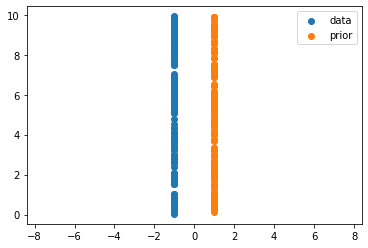

In [ ]:
plt.scatter(*np.load("./2d/moving_barrier-data.npy").T, label="data")
plt.scatter(*np.load("./2d/moving_barrier-prior.npy").T, label="prior")
# plt.xlim((-5, 5))
plt.axis("equal");
plt.legend();

### Barrier with hole

In [1]:
barrier_with_hole = "moving_barrier_with_hole"

In [4]:
np.save(f"./2d/{barrier_with_hole}-data.npy", np.vstack([np.zeros(150) - 4., np.random.random(150) * 10]).T)
end_barrier_y_coord = np.random.random(100) * 2 + (np.random.random(100) > .5) * 8
np.save(f"./2d/{barrier_with_hole}-prior.npy", np.vstack([np.zeros(100) + 4., end_barrier_y_coord]).T)

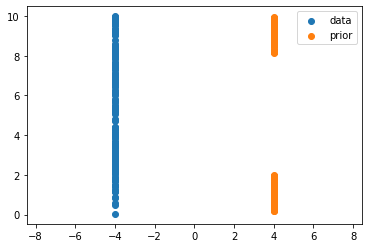

In [5]:
plt.scatter(*np.load(f"./2d/{barrier_with_hole}-data.npy").T, label="data")
plt.scatter(*np.load(f"./2d/{barrier_with_hole}-prior.npy").T, label="prior")
# plt.xlim((-5, 5))
plt.axis("equal");
plt.legend();

### Double-barrier with hole

In [9]:
start_barriers = np.concatenate([
    np.vstack([np.zeros(100) - 4., np.random.random(100) * 10]).T,
    np.vstack([np.zeros(50) - 6., 3 + np.random.random(50) * 4]).T
])
np.save(f"./2d/{barrier_with_hole}-data.npy", start_barriers)

end_barrier_y_coord = np.random.random(100) * 2 + (np.random.random(100) > .5) * 8
np.save(f"./2d/{barrier_with_hole}-prior.npy", np.vstack([np.zeros(100) + 4., end_barrier_y_coord]).T)

In [69]:
barrier_with_hole_patches = [
    (plt.Rectangle, patch(xy=(-5.75,3), width=1.5, height=4))
]

In [84]:
save_patches(barrier_with_hole, barrier_with_hole_patches)

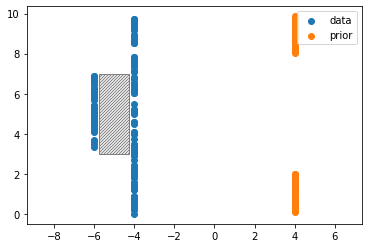

In [72]:
draw_patches(barrier_with_hole_patches)

plt.scatter(*np.load(f"./2d/{barrier_with_hole}-data.npy").T, label="data")
plt.scatter(*np.load(f"./2d/{barrier_with_hole}-prior.npy").T, label="prior")
# plt.xlim((-5, 5))
plt.axis("equal");
plt.legend();

### Dead pool

In [28]:
dead_pool = "dead_pool"

In [29]:
start_groups = np.concatenate([
    np.vstack([np.zeros(800) - 5., np.random.random(800) * 10]).T,
    np.vstack([np.random.normal(size=(200,)) * .5, 5 + np.random.normal(size=(200,)) * .5]).T
])
np.save(f"./2d/{dead_pool}-data.npy", start_groups)

end_barrier_y_coord = np.random.random(800) * 2 + (np.random.random(800) > .5) * 8
np.save(f"./2d/{dead_pool}-prior.npy", np.vstack([np.zeros(800) + 5., end_barrier_y_coord]).T)

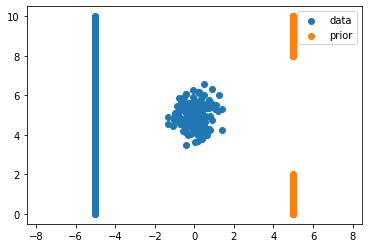

In [30]:
plt.scatter(*np.load(f"./2d/{dead_pool}-data.npy").T, label="data")
plt.scatter(*np.load(f"./2d/{dead_pool}-prior.npy").T, label="prior")
# plt.xlim((-5, 5))
plt.axis("equal");
plt.legend();

In [31]:
dead_pool_patches = [
    (plt.Circle, patch(xy=(0,5), radius=3.5)),
    (plt.Circle, patch(xy=(0,5), radius=2, fc="white", hatch=None)),
    (plt.Rectangle, patch(xy=(4.5, 0), width=1, height=2, hatch=None, ls=':')),
    (plt.Rectangle, patch(xy=(4.5, 8), width=1, height=2, hatch=None, ls=':')),
    (plt.Rectangle, patch(xy=(-5.5, 0), width=1, height=10, hatch=None, ls=':')),
]

In [32]:
save_patches(dead_pool, dead_pool_patches)

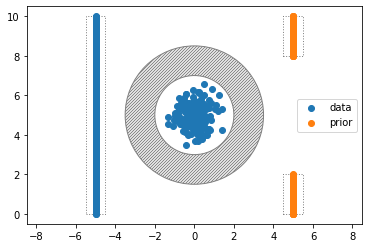

In [33]:
draw_patches(dead_pool_patches)

plt.scatter(*np.load(f"./2d/{dead_pool}-data.npy").T, label="data")
plt.scatter(*np.load(f"./2d/{dead_pool}-prior.npy").T, label="prior")
# plt.xlim((-5, 5))
plt.axis("equal");
plt.legend();

### Centered dead pool

In [36]:
centered_dead_pool = "unbalanced_annulus_dead_pool"

In [37]:
start_groups = np.concatenate([
    np.vstack([np.zeros(800), np.random.random(800) * 10 - 5]).T,
    np.vstack([-5 + np.random.normal(size=(200,)) * .5, np.random.normal(size=(200,)) * .5]).T
])
np.save(f"./2d/{centered_dead_pool}-data.npy", start_groups)

end_barrier_y_coord = -5 + np.random.random(800) * 2 + (np.random.random(800) > .5) * 8
np.save(f"./2d/{centered_dead_pool}-prior.npy", np.vstack([np.zeros(800) + 5., end_barrier_y_coord]).T)

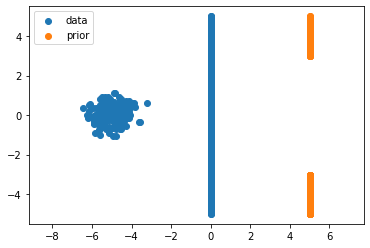

In [38]:
plt.scatter(*np.load(f"./2d/{centered_dead_pool}-data.npy").T, label="data")
plt.scatter(*np.load(f"./2d/{centered_dead_pool}-prior.npy").T, label="prior")
# plt.xlim((-5, 5))
plt.axis("equal");
plt.legend();

In [42]:
centered_dead_pool_patches = [
    (plt.Circle, patch(xy=(-5,0), radius=3.5, zorder=0)),
    (plt.Circle, patch(xy=(-5,0), radius=2, fc="white", zorder=0, hatch=None)),
    (plt.Rectangle, patch(xy=(4.5, -5), width=1, height=2, hatch=None, ls=':')),
    (plt.Rectangle, patch(xy=(4.5, 3), width=1, height=2, hatch=None, ls=':')),
    (plt.Rectangle, patch(xy=(-.5, -5), width=1, height=10, hatch=None, ls=':')),
]

In [43]:
save_patches(centered_dead_pool, centered_dead_pool_patches)

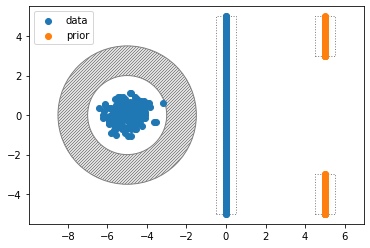

In [44]:
draw_patches(centered_dead_pool_patches)

plt.scatter(*np.load(f"./2d/{centered_dead_pool}-data.npy").T, label="data")
plt.scatter(*np.load(f"./2d/{centered_dead_pool}-prior.npy").T, label="prior")
# plt.xlim((-5, 5))
plt.axis("equal");
plt.legend();

### Moving dead pool

In [10]:
dead_pool = "y_moving_dead_pool"

In [11]:
start_groups = np.concatenate([
    np.vstack([np.zeros(800) - 5., np.random.random(800) * 10]).T,
    np.vstack([np.random.normal(size=(200,)) * .5, 5 + np.random.normal(size=(200,)) * .5]).T
])
np.save(f"./2d/{dead_pool}-data.npy", start_groups)

end_barrier_y_coord = np.random.random(800) * 2 + (np.random.random(800) > .5) * 8
np.save(f"./2d/{dead_pool}-prior.npy", np.vstack([np.zeros(800) + 5., end_barrier_y_coord]).T)

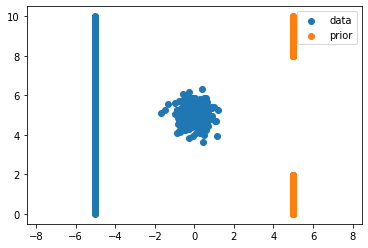

In [12]:
plt.scatter(*np.load(f"./2d/{dead_pool}-data.npy").T, label="data")
plt.scatter(*np.load(f"./2d/{dead_pool}-prior.npy").T, label="prior")
# plt.xlim((-5, 5))
plt.axis("equal");
plt.legend();

In [13]:
dead_pool_patches = [
    (plt.Circle, patch(xy=(0,"10*@t"), radius=3.5)),
    (plt.Circle, patch(xy=(0,"10*@t"), radius=2, fc="white", hatch=None)),
    (plt.Rectangle, patch(xy=(4.5, 0), width=1, height=2, hatch=None, ls=':')),
    (plt.Rectangle, patch(xy=(4.5, 8), width=1, height=2, hatch=None, ls=':')),
    (plt.Rectangle, patch(xy=(-5.5, 0), width=1, height=10, hatch=None, ls=':')),
]

In [14]:
save_patches(dead_pool, dead_pool_patches)

In [23]:
@interact(time=FloatSlider(min=0., max=1.))
def _dyn_plot(time):
    fig, ax = draw_patches(dead_pool_patches, time)

    ax.scatter(*np.load(f"./2d/{dead_pool}-data.npy").T, label="data")
    ax.scatter(*np.load(f"./2d/{dead_pool}-prior.npy").T, label="prior")
    
    ax.set_aspect('equal', adjustable='datalim')
    fig.legend();
    fig.show();


interactive(children=(FloatSlider(value=0.0, description='time', max=1.0), Output()), _dom_classes=('widget-in…

### Rectangle deadpool

In [6]:
rectangle_patches = [
    (plt.Rectangle, patch(xy=(2, 0), width=1, height=10)),
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


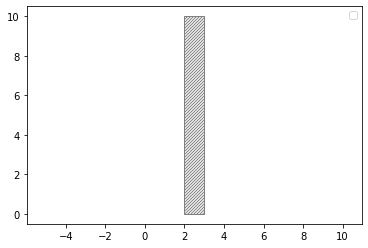

In [7]:
draw_patches(rectangle_patches)
plt.axis("equal");
plt.legend();

In [8]:
save_patches("rectangle_dead_pool", rectangle_patches)

### Rectangle birth

In [16]:
rectangle_birth_patches = [
    (plt.Rectangle, patch(xy=(2, -5), width=1, height=10, hatch="\\\\\\\\")),
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


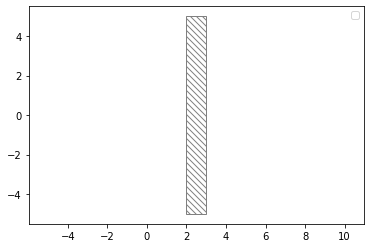

In [17]:
draw_patches(rectangle_birth_patches)
plt.axis("equal");
plt.legend();

In [18]:
save_patches("rectangle_birth", rectangle_birth_patches)

### Rectangle death birth

In [13]:
rectangle_death_birth_patches = [
    (plt.Rectangle, patch(xy=(-3, -5), width=1, height=10)),
    (plt.Rectangle, patch(xy=(2, -5), width=1, height=10, hatch="\\\\\\\\")),
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


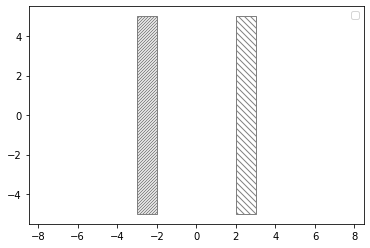

In [14]:
draw_patches(rectangle_death_birth_patches)
plt.axis("equal");
plt.legend();

In [15]:
save_patches("rectangle_death_birth", rectangle_death_birth_patches)

### Split rectangle deadpool

In [7]:
split_rectangle_patches = [
    (plt.Rectangle, patch(xy=(0, -10), width=1, height=9)),
    (plt.Rectangle, patch(xy=(0, 1), width=1, height=9)),
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


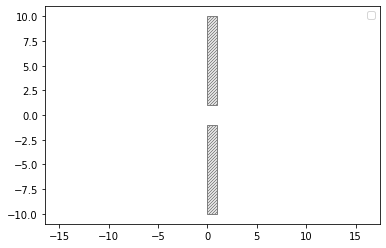

In [8]:
draw_patches(split_rectangle_patches)
plt.axis("equal");
plt.legend();

In [9]:
save_patches("split_rectangle_dead_pool", split_rectangle_patches)

### Double strength death rectangle

In [7]:
ds_rectangle_patches = [
    (plt.Rectangle, patch(xy=(2, -4), width=1, height=8)),
    (plt.Rectangle, patch(xy=(2, -5), width=1, height=1, hatch="///")),
    (plt.Rectangle, patch(xy=(2, 4), width=1, height=1, hatch="///")),
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


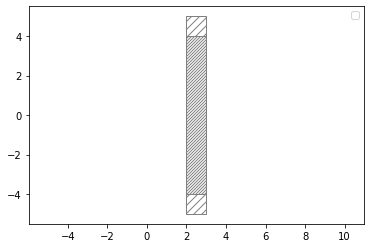

In [8]:
draw_patches(ds_rectangle_patches)
plt.axis("equal");
plt.legend();

In [9]:
save_patches("double_strength_death_rectangle", ds_rectangle_patches)

### Categorical rectangle killers

In [40]:
cat_rectangle_patches = [
    (plt.Rectangle, patch(xy=(-.5, -10), width=1, height=9, hatch="-----")),
    (plt.Rectangle, patch(xy=(-.5, 1), width=1, height=9, hatch="|||||")),
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


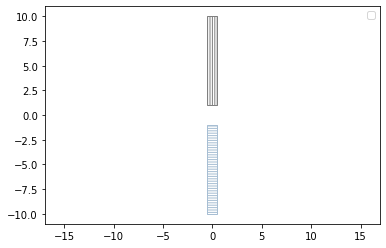

In [39]:
draw_patches(cat_rectangle_patches)
plt.axis("equal");
plt.legend();

In [16]:
save_patches("categorical_split_rectangle", cat_rectangle_patches)

In [69]:
cat_rectangle_colored_patches = [
    (plt.Rectangle, patch(xy=(-.5, -10), width=1, height=9, ec="#F2545B", hatch="-----")),
    (plt.Rectangle, patch(xy=(-.5, 1), width=1, height=9, ec="#A7BED3", hatch="|||||")),
    (plt.Rectangle, patch(xy=(-.5, -10), width=1, height=9, hatch="", ec="black", lw=3)),
    (plt.Rectangle, patch(xy=(-.5, 1), width=1, height=9, hatch="", ec="black", lw=3)),
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


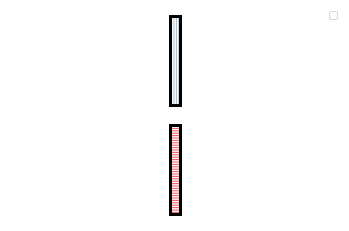

In [71]:
draw_patches(cat_rectangle_colored_patches)
plt.axis("equal");
plt.legend();
plt.axis("off");

save_patches("categorical_split_rectangle_colored", cat_rectangle_colored_patches)

### Outlier (death)

In [7]:
outlier_death_patches = [
    (plt.Rectangle, patch(xy=(-2, 2), width=1, height=4)),
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


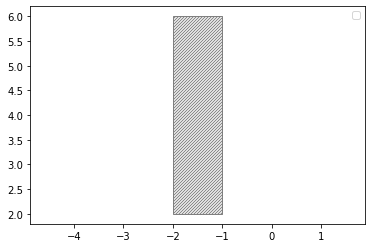

In [8]:
draw_patches(outlier_death_patches)
plt.axis("equal");
plt.legend();

In [9]:
save_patches("outlier_death", outlier_death_patches)

### Outlier (death+birth)

In [14]:
outlier_death_birth_patches = [
    (plt.Rectangle, patch(xy=(-2, 2), width=1, height=4)),
    (plt.Rectangle, patch(xy=(1, -2), width=1, height=4, hatch="\\\\\\\\")),
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


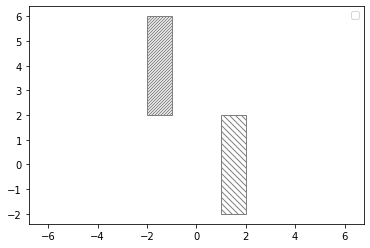

In [15]:
draw_patches(outlier_death_birth_patches)
plt.axis("equal");
plt.legend();

In [16]:
save_patches("outlier_death_birth", outlier_death_birth_patches)

### Outlier (progressive death)

In [10]:
progressive_death_patches = [
    (plt.Rectangle, patch(xy=(-3.5, 2), width=1, height=4)),
    (plt.Rectangle, patch(xy=(-0.5, -2), width=1, height=4)),
    (plt.Rectangle, patch(xy=(2.5, -6), width=1, height=4)),
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


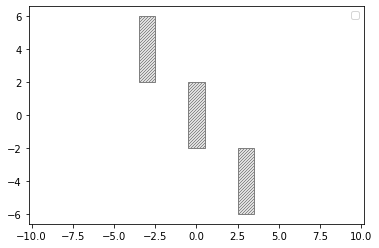

In [11]:
draw_patches(progressive_death_patches)
plt.axis("equal");
plt.legend();

In [12]:
save_patches("progressive_death", progressive_death_patches)